In [36]:
from mmdata import *
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

In [2]:
conference_away.head()

,YEAR,CONF ID,CONF,BADJ EM,BADJ O,BADJ D,BARTHAG,G,W,L,...,AVG HGT,EFF HGT,EXP,TALENT,FT%,OP FT%,PPPO,PPPD,ELITE SOS,WAB
0,2024,1,A10,5.1,109.2,104.1,0.634,167,65,102,...,77.133,80.264,1.884,18.386,73.4,72.5,1.045,1.088,30.416,-2.3
1,2024,2,ACC,10.0,110.9,100.9,0.748,169,64,105,...,77.897,81.078,1.653,62.324,72.6,74.4,1.035,1.093,43.482,-0.9
2,2024,3,AE,-5.7,100.9,106.6,0.347,150,57,93,...,76.776,79.091,2.147,6.236,69.8,72.3,0.996,1.057,17.208,-6.4
3,2024,4,Amer,3.3,108.1,104.8,0.588,161,64,97,...,77.293,80.347,2.237,30.455,70.3,73.4,1.050,1.094,26.317,-2.8
4,2024,5,ASun,-8.0,103.5,111.5,0.298,195,50,145,...,76.777,79.668,2.026,8.164,72.8,72.2,1.034,1.142,18.353,-8.0


In [3]:
# Merge Conference play data
conference_away.groupby("YEAR")
conference_home.groupby("YEAR")
conference_play =pd.concat([conference_home, conference_away], axis=1)
conference_away_neutral.groupby("YEAR")
conference_play = pd.concat([conference_play, conference_away_neutral], axis=1)
print(conference_play)

     YEAR  CONF ID  CONF  BADJ EM  BADJ O  BADJ D  BARTHAG    G    W   L  ...  \
0    2024        1   A10      5.7   108.0   102.3    0.651  241  169  72  ...   
1    2024        2   ACC     13.0   111.9    98.9    0.805  250  180  70  ...   
2    2024        3    AE     -5.1   101.7   106.8    0.363  112   70  42  ...   
3    2024        4  Amer      4.4   108.6   104.2    0.617  215  143  72  ...   
4    2024        5  ASun     -8.1   104.2   112.3    0.297  145   93  52  ...   
..    ...      ...   ...      ...     ...     ...      ...  ...  ...  ..  ...   
514  2008       21   NEC     -9.6    96.8   106.4    0.252  156   77  79  ...   
515  2008       22   OVC     -9.8    98.7   108.5    0.252  137   77  60  ...   
516  2008       35   ind    -13.2    94.3   107.5    0.181   86   37  49  ...   
517  2008       18  MEAC    -13.3    91.9   105.2    0.175  119   75  44  ...   
518  2008       31  SWAC    -18.2    91.0   109.2    0.109  101   53  48  ...   

     AVG HGT  EFF HGT    EX

In [4]:
#Conver to DataFrame
conference_play = pd.DataFrame(conference_play)
conference_play

,YEAR,CONF ID,CONF,BADJ EM,BADJ O,BADJ D,BARTHAG,G,W,L,...,AVG HGT,EFF HGT,EXP,TALENT,FT%,OP FT%,PPPO,PPPD,ELITE SOS,WAB
0,2024,1,A10,5.7,108.0,102.3,0.651,241,169,72,...,77.133,80.264,1.884,18.386,73.3,72.0,1.039,1.070,28.329,-3.1
1,2024,2,ACC,13.0,111.9,98.9,0.805,250,180,70,...,77.897,81.078,1.653,62.324,73.6,74.2,1.042,1.085,41.170,-1.0
2,2024,3,AE,-5.1,101.7,106.8,0.363,112,70,42,...,76.776,79.091,2.147,6.236,70.0,72.0,1.000,1.054,16.777,-6.5
3,2024,4,Amer,4.4,108.6,104.2,0.617,215,143,72,...,77.293,80.347,2.237,30.455,70.6,72.5,1.045,1.084,25.626,-3.9
4,2024,5,ASun,-8.1,104.2,112.3,0.297,145,93,52,...,76.777,79.668,2.026,8.164,73.0,72.4,1.038,1.136,17.471,-8.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,2008,21,NEC,-9.6,96.8,106.4,0.252,156,77,79,...,76.372,79.194,1.632,6.229,67.5,66.7,0.948,1.052,17.013,-8.6
515,2008,22,OVC,-9.8,98.7,108.5,0.252,137,77,60,...,76.133,79.111,1.713,9.039,67.8,70.2,0.991,1.082,14.722,-8.7
516,2008,35,ind,-13.2,94.3,107.5,0.181,86,37,49,...,75.951,79.037,1.791,4.541,64.9,66.5,0.914,1.059,16.911,-9.8
517,2008,18,MEAC,-13.3,91.9,105.2,0.175,119,75,44,...,75.529,78.734,1.671,1.135,66.0,69.1,0.881,1.098,21.032,-8.1


In [5]:
conference_play.columns

Index(['YEAR', 'CONF ID', 'CONF', 'BADJ EM', 'BADJ O', 'BADJ D', 'BARTHAG',
       'G', 'W', 'L',
       ...
       'AVG HGT', 'EFF HGT', 'EXP', 'TALENT', 'FT%', 'OP FT%', 'PPPO', 'PPPD',
       'ELITE SOS', 'WAB'],
      dtype='object', length=135)

In [6]:
# Encocded conference play data
conference_play_encoded = pd.get_dummies(conference_play)

In [20]:
heat_check

,YEAR,TEAM NO,TEAM,SEED,ROUND,POWER,PATH,WINS,POOL VALUE,POOL S-RANK,NCAA S-RANK,VAL Z-SCORE,POWER-PATH
0,2024,1067,Connecticut,1,0,91.3,64.5,0,92.6,1,1,NaN,26.8
1,2024,1026,Stetson,16,0,47.1,91.0,0,0.5,64,62,NaN,-43.9
2,2024,1060,Florida Atlantic,8,0,69.3,73.2,0,9.0,28,31,NaN,-3.9
3,2024,1036,Northwestern,9,0,62.9,75.5,0,4.2,45,36,NaN,-12.6
4,2024,1029,San Diego St.,5,0,71.5,68.2,0,14.7,22,18,NaN,3.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,2013,336,VCU,5,32,70.8,73.3,1,7.8,38,20,-1.170,-2.5
700,2013,335,Villanova,9,64,60.5,78.4,0,3.0,52,38,-1.227,-17.9
701,2013,334,Western Kentucky,16,64,50.0,86.1,0,0.9,62,61,0.311,-36.1
702,2013,333,Wichita St.,9,4,68.7,81.1,4,5.7,45,35,-0.553,-12.4


In [23]:

heat_check = heat_check.drop(columns=['TEAM NO'])
heat_check = heat_check.dropna()
heat_check.head()

,YEAR,TEAM,SEED,ROUND,POWER,PATH,WINS,POOL VALUE,POOL S-RANK,NCAA S-RANK,VAL Z-SCORE,POWER-PATH
64,2023,Alabama,1,16,85.2,63.8,2,74.7,4,1,0.144,21.4
65,2023,Arizona,2,64,80.9,65.3,0,57.5,7,7,-0.247,15.6
66,2023,Arizona St.,11,64,60.2,75.2,0,4.3,48,45,-0.714,-15.0
67,2023,Arkansas,8,16,78.1,75.6,2,23.1,19,30,2.032,2.5
68,2023,Auburn,9,32,71.9,72.7,1,13.8,26,35,1.469,-0.8


In [10]:
team_resume

,YEAR,TEAM NO,TEAM,SEED,ROUND,NET RPI,RESUME,WAB RANK,ELO,B POWER,Q1 W,Q2 W,Q1 PLUS Q2 W,Q3 Q4 L,PLUS 500,R SCORE,BID TYPE
0,2024,1079,Akron,14,0,106,131,104,103,111.5,0,2,2,4,13,0.00,At-Large
1,2024,1078,Alabama,4,0,10,31,15,31,11.5,4,7,11,0,11,99.35,At-Large
2,2024,1077,Arizona,2,0,4,10,11,14,5.5,8,7,15,1,18,99.87,At-Large
3,2024,1076,Auburn,4,0,5,45,9,5,4.0,3,10,13,0,21,99.42,At-Large
4,2024,1075,Baylor,3,0,13,8,10,25,13.5,10,4,14,0,14,99.73,At-Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074,2008,5,West Virginia,7,16,29,32,28,29,20.0,3,2,5,1,13,96.80,At-Large
1075,2008,4,Western Kentucky,12,16,39,124,46,25,45.0,0,1,1,1,19,5.30,Auto
1076,2008,3,Winthrop,13,64,108,121,108,93,96.0,1,2,3,7,9,0.00,Auto
1077,2008,2,Wisconsin,3,16,11,9,8,5,6.0,6,2,8,0,25,99.90,Auto


In [11]:
team_results

,TEAM ID,TEAM,PAKE,PAKE RANK,PASE,PASE RANK,GAMES,W,L,WIN%,R64,R32,S16,E8,F4,F2,CHAMP,TOP2,F4%,CHAMP%
0,1,Abilene Christian,0.7,45,0.7,52,3,1,2,0.333,2,1,0,0,0,0,0,0,0.10%,0.00%
1,2,Akron,-0.9,179,-1.1,187,4,0,4,0.000,4,0,0,0,0,0,0,0,0.50%,0.00%
2,3,Alabama,-2.1,211,-2.9,220,10,5,5,0.500,5,3,2,0,0,0,0,2,48.40%,15.40%
3,4,Albany,-0.4,147,-0.3,138,3,0,3,0.000,3,0,0,0,0,0,0,0,0.00%,0.00%
4,6,American,-0.5,160,-0.4,150,3,0,3,0.000,3,0,0,0,0,0,0,0,0.20%,0.00%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,241,Wofford,-1.2,191,-0.9,175,6,1,5,0.167,5,1,0,0,0,0,0,0,3.60%,0.20%
232,242,Wright St.,-0.2,118,-0.2,119,2,0,2,0.000,2,0,0,0,0,0,0,0,0.00%,0.00%
233,243,Wyoming,-0.2,118,-0.5,159,1,0,1,0.000,1,0,0,0,0,0,0,0,0.00%,0.00%
234,244,Xavier,4.1,14,2.7,22,28,18,10,0.643,10,9,7,2,0,0,0,2,51.90%,8.70%


In [12]:
#Find correlation between team resume and team results
team_resume_results = pd.concat([team_resume, team_results], axis=1)
team_resume_results

,YEAR,TEAM NO,TEAM,SEED,ROUND,NET RPI,RESUME,WAB RANK,ELO,B POWER,...,R64,R32,S16,E8,F4,F2,CHAMP,TOP2,F4%,CHAMP%
0,2024,1079,Akron,14,0,106,131,104,103,111.5,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.10%,0.00%
1,2024,1078,Alabama,4,0,10,31,15,31,11.5,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.50%,0.00%
2,2024,1077,Arizona,2,0,4,10,11,14,5.5,...,5.0,3.0,2.0,0.0,0.0,0.0,0.0,2.0,48.40%,15.40%
3,2024,1076,Auburn,4,0,5,45,9,5,4.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00%,0.00%
4,2024,1075,Baylor,3,0,13,8,10,25,13.5,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.20%,0.00%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074,2008,5,West Virginia,7,16,29,32,28,29,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1075,2008,4,Western Kentucky,12,16,39,124,46,25,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1076,2008,3,Winthrop,13,64,108,121,108,93,96.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1077,2008,2,Wisconsin,3,16,11,9,8,5,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
team_resume_results.columns

Index(['YEAR', 'TEAM NO', 'TEAM', 'SEED', 'ROUND', 'NET RPI', 'RESUME',
       'WAB RANK', 'ELO', 'B POWER', 'Q1 W', 'Q2 W', 'Q1 PLUS Q2 W', 'Q3 Q4 L',
       'PLUS 500', 'R SCORE', 'BID TYPE', 'TEAM ID', 'TEAM', 'PAKE',
       'PAKE RANK', 'PASE', 'PASE RANK', 'GAMES', 'W', 'L', 'WIN%', 'R64',
       'R32', 'S16', 'E8', 'F4', 'F2', 'CHAMP', 'TOP2', 'F4%', 'CHAMP%'],
      dtype='object')

In [14]:
# Clean up the data
team_resume_results = team_resume_results.dropna()
team_resume_results = team_resume_results.drop(columns=['TEAM NO'])
team_resume_results

,YEAR,TEAM,SEED,ROUND,NET RPI,RESUME,WAB RANK,ELO,B POWER,Q1 W,...,R64,R32,S16,E8,F4,F2,CHAMP,TOP2,F4%,CHAMP%
0,2024,Akron,14,0,106,131,104,103,111.5,0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.10%,0.00%
1,2024,Alabama,4,0,10,31,15,31,11.5,4,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.50%,0.00%
2,2024,Arizona,2,0,4,10,11,14,5.5,8,...,5.0,3.0,2.0,0.0,0.0,0.0,0.0,2.0,48.40%,15.40%
3,2024,Auburn,4,0,5,45,9,5,4.0,3,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00%,0.00%
4,2024,Baylor,3,0,13,8,10,25,13.5,10,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.20%,0.00%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,2021,Liberty,13,64,86,161,76,57,93.7,0,...,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.60%,0.20%
232,2021,Loyola Chicago,8,16,10,64,33,8,23.0,2,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00%,0.00%
233,2021,LSU,8,32,28,18,28,25,27.0,5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00%,0.00%
234,2021,Maryland,10,32,35,21,53,68,35.3,4,...,10.0,9.0,7.0,2.0,0.0,0.0,0.0,2.0,51.90%,8.70%


In [24]:
# Merge team resume results with conference play data
team_resume_results_conference = pd.concat([team_resume_results, conference_play], axis=1)

In [26]:
#Merge with heat check data
team_resume_results_conference_heat = pd.concat([team_resume_results_conference, heat_check], axis=1)
team_resume_results_conference_heat

,YEAR,TEAM,SEED,ROUND,NET RPI,RESUME,WAB RANK,ELO,B POWER,Q1 W,...,SEED,ROUND,POWER,PATH,WINS,POOL VALUE,POOL S-RANK,NCAA S-RANK,VAL Z-SCORE,POWER-PATH
0,2024.0,Akron,14.0,0.0,106.0,131.0,104.0,103.0,111.5,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024.0,Alabama,4.0,0.0,10.0,31.0,15.0,31.0,11.5,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024.0,Arizona,2.0,0.0,4.0,10.0,11.0,14.0,5.5,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024.0,Auburn,4.0,0.0,5.0,45.0,9.0,5.0,4.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024.0,Baylor,3.0,0.0,13.0,8.0,10.0,25.0,13.5,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,32.0,70.8,73.3,1.0,7.8,38.0,20.0,-1.170,-2.5
700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.0,64.0,60.5,78.4,0.0,3.0,52.0,38.0,-1.227,-17.9
701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.0,64.0,50.0,86.1,0.0,0.9,62.0,61.0,0.311,-36.1
702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.0,4.0,68.7,81.1,4.0,5.7,45.0,35.0,-0.553,-12.4


In [29]:
# Upsets 
upsets = pd.concat([num_of_upsets, upeset_seed_info], axis=1)
upsets


,YEAR,FIRST ROUND,SECOND ROUND,SWEET 16,ELITE 8,FINAL 4,TOTAL,YEAR,CURRENT ROUND,SEED WON,SEED LOST,SEED DIFF
0,2023.0,5.0,4.0,3.0,2.0,0.0,14.0,2023,64,13,4,9
1,2022.0,7.0,5.0,4.0,0.0,1.0,17.0,2023,64,15,2,13
2,2021.0,9.0,6.0,2.0,1.0,0.0,18.0,2023,64,16,1,15
3,2019.0,8.0,0.0,1.0,2.0,0.0,11.0,2023,64,11,6,5
4,2018.0,6.0,5.0,3.0,1.0,0.0,15.0,2023,64,10,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...
202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008,64,12,5,7
203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008,64,13,4,9
204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008,32,10,2,8
205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008,32,7,2,5


In [30]:
# Merge upsets with the rest
tourney_data = pd.concat([team_resume_results_conference_heat, upsets], axis=1)
tourney_data

,YEAR,TEAM,SEED,ROUND,NET RPI,RESUME,WAB RANK,ELO,B POWER,Q1 W,...,SECOND ROUND,SWEET 16,ELITE 8,FINAL 4,TOTAL,YEAR,CURRENT ROUND,SEED WON,SEED LOST,SEED DIFF
0,2024.0,Akron,14.0,0.0,106.0,131.0,104.0,103.0,111.5,0.0,...,4.0,3.0,2.0,0.0,14.0,2023.0,64.0,13.0,4.0,9.0
1,2024.0,Alabama,4.0,0.0,10.0,31.0,15.0,31.0,11.5,4.0,...,5.0,4.0,0.0,1.0,17.0,2023.0,64.0,15.0,2.0,13.0
2,2024.0,Arizona,2.0,0.0,4.0,10.0,11.0,14.0,5.5,8.0,...,6.0,2.0,1.0,0.0,18.0,2023.0,64.0,16.0,1.0,15.0
3,2024.0,Auburn,4.0,0.0,5.0,45.0,9.0,5.0,4.0,3.0,...,0.0,1.0,2.0,0.0,11.0,2023.0,64.0,11.0,6.0,5.0
4,2024.0,Baylor,3.0,0.0,13.0,8.0,10.0,25.0,13.5,10.0,...,5.0,3.0,1.0,0.0,15.0,2023.0,64.0,10.0,7.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# Change NaN to 0
tourney_data = tourney_data.fillna(0)
tourney_data

,YEAR,TEAM,SEED,ROUND,NET RPI,RESUME,WAB RANK,ELO,B POWER,Q1 W,...,SECOND ROUND,SWEET 16,ELITE 8,FINAL 4,TOTAL,YEAR,CURRENT ROUND,SEED WON,SEED LOST,SEED DIFF
0,2024.0,Akron,14.0,0.0,106.0,131.0,104.0,103.0,111.5,0.0,...,4.0,3.0,2.0,0.0,14.0,2023.0,64.0,13.0,4.0,9.0
1,2024.0,Alabama,4.0,0.0,10.0,31.0,15.0,31.0,11.5,4.0,...,5.0,4.0,0.0,1.0,17.0,2023.0,64.0,15.0,2.0,13.0
2,2024.0,Arizona,2.0,0.0,4.0,10.0,11.0,14.0,5.5,8.0,...,6.0,2.0,1.0,0.0,18.0,2023.0,64.0,16.0,1.0,15.0
3,2024.0,Auburn,4.0,0.0,5.0,45.0,9.0,5.0,4.0,3.0,...,0.0,1.0,2.0,0.0,11.0,2023.0,64.0,11.0,6.0,5.0
4,2024.0,Baylor,3.0,0.0,13.0,8.0,10.0,25.0,13.5,10.0,...,5.0,3.0,1.0,0.0,15.0,2023.0,64.0,10.0,7.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
700,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
701,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
702,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
# Encode tourney data 
tourney_data_encoded = pd.get_dummies(tourney_data)

tourney_data_encoded


,YEAR,SEED,ROUND,NET RPI,RESUME,WAB RANK,ELO,B POWER,Q1 W,Q2 W,...,TEAM_Western Kentucky,TEAM_Western Michigan,TEAM_Wichita St.,TEAM_Winthrop,TEAM_Wisconsin,TEAM_Wofford,TEAM_Wright St.,TEAM_Wyoming,TEAM_Xavier,TEAM_Yale
0,2024.0,14.0,0.0,106.0,131.0,104.0,103.0,111.5,0.0,2.0,...,False,False,False,False,False,False,False,False,False,False
1,2024.0,4.0,0.0,10.0,31.0,15.0,31.0,11.5,4.0,7.0,...,False,False,False,False,False,False,False,False,False,False
2,2024.0,2.0,0.0,4.0,10.0,11.0,14.0,5.5,8.0,7.0,...,False,False,False,False,False,False,False,False,False,False
3,2024.0,4.0,0.0,5.0,45.0,9.0,5.0,4.0,3.0,10.0,...,False,False,False,False,False,False,False,False,False,False
4,2024.0,3.0,0.0,13.0,8.0,10.0,25.0,13.5,10.0,4.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
700,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
701,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,False,False,False,False,False,False,False,False,False
702,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,True,False,False,False,False,False,False,False


In [37]:
# Split the data into features and target
X = tourney_data_encoded.drop(columns=['CHAMP'])
y = tourney_data_encoded['CHAMP']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [38]:
# Scale the data
X_scaler = StandardScaler()
X_scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [39]:
# Keras Sequential Model
model = tf.keras.models.Sequential()


In [40]:
# Add layers
nodes = len(X.columns)

model.add(tf.keras.layers.Dense(units=nodes, activation='relu', input_dim=nodes))

In [41]:
# Output layer
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1070)              1145970   
                                                                 
 dense_1 (Dense)             (None, 1)                 1071      
                                                                 
Total params: 1147041 (4.38 MB)
Trainable params: 1147041 (4.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [52]:
# Compile the model and fit 
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

fit_model = model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
17/17 [==============================] - 0s 2ms/step - loss: -34347.3398 - accuracy: 0.9924
Epoch 2/100
17/17 [==============================] - 0s 2ms/step - loss: -34396.4727 - accuracy: 0.9962
Epoch 3/100
17/17 [==============================] - 0s 2ms/step - loss: -34439.0898 - accuracy: 0.9943
Epoch 4/100
17/17 [==============================] - 0s 2ms/step - loss: -34473.5586 - accuracy: 0.9886
Epoch 5/100
17/17 [==============================] - 0s 3ms/step - loss: -34510.5195 - accuracy: 0.9962
Epoch 6/100
17/17 [==============================] - 0s 2ms/step - loss: -34556.0664 - accuracy: 0.9943
Epoch 7/100
17/17 [==============================] - 0s 3ms/step - loss: -34603.0938 - accuracy: 0.9924
Epoch 8/100
17/17 [==============================] - 0s 2ms/step - loss: -34647.0625 - accuracy: 0.9943
Epoch 9/100
17/17 [==============================] - 0s 2ms/step - loss: -34695.3359 - accuracy: 0.9943
Epoch 10/100
17/17 [==============================] - 0s 3ms/ste

In [53]:
# Evaluate the model
model_loss, model_accuracy = model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

6/6 - 0s - loss: 2582.0730 - accuracy: 0.8636 - 107ms/epoch - 18ms/step
Loss: 2582.072998046875, Accuracy: 0.8636363744735718


<Axes: >

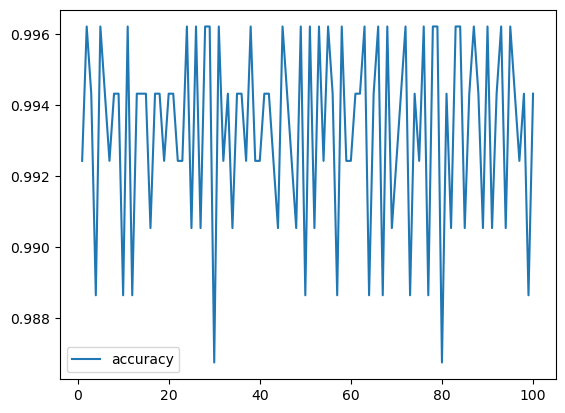

In [55]:
# Model history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history['loss'])+1))
history_df.plot(y='accuracy')

In [57]:
# Craete a mehtod that creates a new model with hyperparameters
def create_model(hp):
    model = tf.keras.models.Sequential()
    activation = hp.Choice('activation', values=['relu', 'tanh', 'sigmoid'])
    model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
                                                 min_value=1,
                                                 max_value=10,
                                                 step=1), activation=activation, input_dim=nodes))
    for i in range(hp.Int('num_layers', 1, 10)):
        model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
                                                     min_value=1,
                                                     max_value=10,
                                                     step=1), activation=activation))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [58]:
import kerastuner as kt
tuner = kt.Hyperband(create_model,
                     objective='val_accuracy',
                     max_epochs=100,
                     hyperband_iterations=2)

C:\Users\thoma\AppData\Local\Temp\ipykernel_18484\791855487.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [59]:
# Search for the best hyperparameters
tuner.search(X_train_scaled, y_train, epochs=100, validation_data=(X_test_scaled, y_test))

Trial 508 Complete [00h 00m 08s]
val_accuracy: 0.9715909361839294

Best val_accuracy So Far: 0.9772727489471436
Total elapsed time: 00h 24m 55s


In [60]:
# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_hps.values

{'activation': 'tanh',
 'first_units': 7,
 'num_layers': 8,
 'units_0': 6,
 'units_1': 7,
 'units_2': 9,
 'units_3': 7,
 'units_4': 4,
 'units_5': 5,
 'units_6': 9,
 'units_7': 4,
 'units_8': 5,
 'units_9': 1,
 'tuner/epochs': 12,
 'tuner/initial_epoch': 4,
 'tuner/bracket': 4,
 'tuner/round': 2,
 'tuner/trial_id': '0104'}

In [61]:
# Build the model with the optimal hyperparameters and train it on the data
model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")



6/6 [==============================] - 0s 2ms/step - loss: 0.1403 - accuracy: 0.9773
Loss: 0.1403372436761856, Accuracy: 0.9772727489471436
